## Image Matching

Image matching is an important concept in computer vision and object recognition. The images of the same subject can be acquired from different angles, lighting and scales. Therefore, it is best to find features that are descriptive and invariant to the aforementioned variations in order to categorize the images correctly.

SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

In [ ]:
!pip uninstall opencv-python
!pip install -U opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 24 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root = '/content/drive/MyDrive/DL-CSF425/Datasets'
data_path = '/content/drive/MyDrive/DL-CSF425/Datasets/teethData'

In [ ]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    clahe = cv2.createCLAHE(clipLimit=3)
    img = clahe.apply(img)
    return img

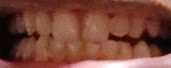

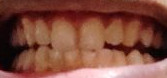

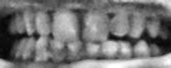

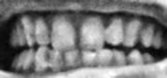

(None, None)

In [ ]:
from google.colab.patches import cv2_imshow
temp_img1 = cv2.imread('/content/drive/MyDrive/DL-CSF425/Datasets/teethData/11_P1_S1_1.jpg')
temp_img2 = cv2.imread('/content/drive/MyDrive/DL-CSF425/Datasets/teethData/11_P1_S1_2.jpg')
cv2_imshow(temp_img1), cv2_imshow(temp_img2)

temp_img1 = preprocess(temp_img1)
temp_img2 = preprocess(temp_img2)
cv2_imshow(temp_img1), cv2_imshow(temp_img2)

In [ ]:
file_out = data_root + '/' + 'output_SIFT_0.csv'

In [ ]:
#file1 = open("/content/temp.txt", "w")
#path1 = '/content/data'


sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()
output_SIFT_1 = []
genuine = []
imposter = []

for images in natsorted(os.listdir(data_path)):
    str1 = str(images)
    img1 = os.path.join(data_path, images)
    #print(img1)
    img1 = cv2.imread(img1)
    img1 = preprocess(img1)
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
       for image in natsorted(os.listdir(data_path)):
           img2 = os.path.join(data_path, image)
            #print(img2)
           str2 = str(image)
           if (str1.split("_")[2]==str2.split("_")[2]):
               #print(str1.split("_"))
               continue
           if (img1 != img2): # queryImage
               img2 = cv2.imread(img2) # trainImage
               img2 = preprocess(img2)
               kp2, des2 = sift.detectAndCompute(img2,None)

               if des1 is None:
                 output_SIFT_1.append([str1, str2, 0])
                 print(str1 + " " + str2 + " " + str(0))
                 continue
               if des2 is None:
                 output_SIFT_1.append([str1, str2, 0])
                 print(str1 + " " + str2 + " " + str(0))
                 continue

            # Initiate SIFT detector
            #sift = cv2.SIFT()            
            # find the keypoints and descriptors with SIFT
            # BFMatcher with default params
               matches = bf.knnMatch(des1,des2, k=2)
               dis = bf.match(des1,des2)
            #----------------------------------------------
               number_keypoints = 0
               if len(kp1) <= len(kp2):
                   number_keypoints = len(kp1)
               else:
                   number_keypoints = len(kp2)
               good = []

               try:
                 for m,n in matches:
                     if m.distance < 0.9*n.distance:
                         good.append([m])
               except:
                 pass 
               score = len(good) / number_keypoints
               if(score>1):
                 output_SIFT_1.append([str1, str2, score])
                 print(str1 + " " + str2 + " " + str(score))
                 if (str1.split("_")[0]==str2.split("_")[0]):
                   genuine.append(score)
                 else:
                   imposter.append(score)
               else:
                 output_SIFT_1.append([str1, str2, score])
                 print(str1 + " " + str2 + " " + str(score))
                 if (str1.split("_")[0]==str2.split("_")[0]):
                   genuine.append(score)
                 else:
                   imposter.append(score)
               #for m,n in matches:
                   #if m.distance < 0.7*n.distance:
                      #good.append([m])
            #print("Keypoints 1ST Image: " + str(len(kp1)))
            #print("Keypoints 2ND Image: " + str(len(kp2)))
            #print("GOOD Matches:", len(good)) 
               #score = len(good) / number_keypoints
            #print("How good it's the match: ", score) #* 100, "%")
               #file1.write( str1 + " " + str2 + " " + str(score)+"\n")
               #print(str1 + " " + str2 + " " + str(score)) # replace with 'cos' if using cosine similarity
#file1.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
27_P1_S2_2.jpg 17_P1_S1_3.jpg 0.3055555555555556
27_P1_S2_2.jpg 17_P1_S1_4.jpg 0.3333333333333333
27_P1_S2_2.jpg 17_P1_S1_5.jpg 0.30303030303030304
27_P1_S2_2.jpg 18_P1_S1_1.jpg 0.5
27_P1_S2_2.jpg 18_P1_S1_2.jpg 0.4411764705882353
27_P1_S2_2.jpg 18_P1_S1_3.jpg 0.5
27_P1_S2_2.jpg 18_P1_S1_4.jpg 0.4153846153846154
27_P1_S2_2.jpg 18_P1_S1_5.jpg 0.3125
27_P1_S2_2.jpg 19_P1_S1_1.jpg 0.3625
27_P1_S2_2.jpg 19_P1_S1_2.jpg 0.2236842105263158
27_P1_S2_2.jpg 19_P1_S1_3.jpg 0.27710843373493976
27_P1_S2_2.jpg 19_P1_S1_4.jpg 0.27631578947368424
27_P1_S2_2.jpg 19_P1_S1_5.jpg 0.5957446808510638
27_P1_S2_2.jpg 20_P1_S1_1.jpg 0.20689655172413793
27_P1_S2_2.jpg 20_P1_S1_2.jpg 0.17204301075268819
27_P1_S2_2.jpg 20_P1_S1_3.jpg 0.20430107526881722
27_P1_S2_2.jpg 20_P1_S1_4.jpg 0.17204301075268819
27_P1_S2_2.jpg 20_P1_S1_5.jpg 0.24731182795698925
27_P1_S2_2.jpg 21_P1_S1_1.jpg 0.21505376344086022
27_P1_S2_2.jpg 21_P1_S1_2.jpg 0.2247191011235955
27_P1_S2_2.jpg

In [ ]:
len(imposter),len(genuine)

(43210, 1490)

In [ ]:
import pandas as pd
output_df = pd.DataFrame(output_SIFT_1)
print(output_df.tail(5))
print(output_df.head(5))
print(output_df.sample(5))

                    0               1         2
44695  30_P1_S2_5.jpg  30_P1_S1_1.jpg  0.426966
44696  30_P1_S2_5.jpg  30_P1_S1_2.jpg  0.428571
44697  30_P1_S2_5.jpg  30_P1_S1_3.jpg  0.409091
44698  30_P1_S2_5.jpg  30_P1_S1_4.jpg  0.561798
44699  30_P1_S2_5.jpg  30_P1_S1_5.jpg  0.438202
               0              1         2
0  1_P1_S1_1.jpg  1_P1_S2_1.jpg  0.252874
1  1_P1_S1_1.jpg  1_P1_S2_2.jpg  0.229885
2  1_P1_S1_1.jpg  1_P1_S2_3.jpg  0.206897
3  1_P1_S1_1.jpg  1_P1_S2_4.jpg  0.252874
4  1_P1_S1_1.jpg  1_P1_S2_5.jpg  0.275862
                    0               1         2
41330  28_P1_S2_3.jpg  14_P1_S1_3.jpg  0.323529
7961    6_P1_S1_4.jpg   8_P1_S2_2.jpg  0.258621
10462   7_P1_S2_5.jpg  30_P1_S1_3.jpg  0.250000
17215  12_P1_S2_1.jpg   5_P1_S1_1.jpg  0.184615
31108  21_P1_S2_5.jpg   3_P1_S1_3.jpg  0.234848


In [ ]:
output_df.to_csv(file_out)

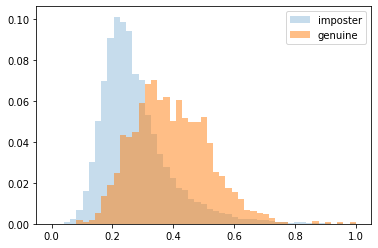

In [ ]:
bins = np.linspace(0, 1, 50)
plt.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
plt.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
plt.legend(loc='upper right')
fig_loc = data_root + '/' + 'output.png'
plt.savefig(fig_loc)
plt.show()

In [ ]:
total_matches = len(genuine)+ len(imposter)

Function to get the FAR and FRR corresponding to a threshold value

In [ ]:
def get_far_and_frr(thres,frr_arr,far_arr,total=total_matches,gen = genuine,impos = imposter):
  incorrect_rec = 0
  correct_not_rec =0
  for i in impos:
    if i>=thres:
      incorrect_rec+=1
  #far = incorrect_rec/total
  far = incorrect_rec/len(impos)
  far_arr.append(far)

  for i in gen:
    if i<thres:
      correct_not_rec+=1
  #frr = correct_not_rec/total
  frr = correct_not_rec/len(gen)
  frr_arr.append(frr)

In [ ]:
threshold = np.arange(0,1,0.02).tolist()

frr = []
far= []
for i in threshold:
  get_far_and_frr(i,frr,far)

eer = 0
corres_thres=0
for i in range(len(threshold)):
  if abs(far[i]-frr[i])<0.05:
    eer = far[i]
    corres_thres = threshold[i]
    print('EER: ',eer)
    print('Threshold: ',corres_thres)
    break

EER:  0.25843554732700763
Threshold:  0.32


Funtion to get CRR

In [104]:
def get_crr(total_matches  = total_matches,gen = genuine,threshold = corres_thres):
  correct = 0
  for i in gen:
    if i>=threshold:
      correct +=1
  for i in imposter:
    if i<threshold:
      correct+=1
  #print (correct)
  #num_matches = len(genuine)
  crr = correct/total_matches
  print('CRR: ',crr)
  #return correct/num_matches

In [105]:
get_crr()

CRR:  0.7399552572706936


Funtion to get the Accuracy of the system

In [ ]:
def get_accuracy(threshold = threshold, frr = frr, far= far):
  max = 0
  i = 0
  for i in range(len(threshold)):
    current = 100 - (frr[i] +far[i])/2
    if current >=max:
      max = current
  print('Accuracy: ',max)
  #return max

In [ ]:
get_accuracy()

Accuracy:  99.72287664892386


ROC

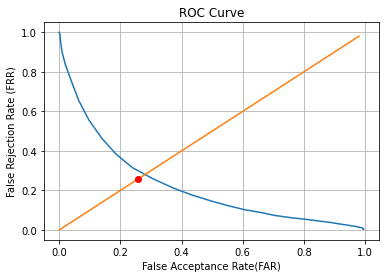

In [ ]:
plt.plot(frr, far)
plt.plot(threshold, threshold)
plt.plot(eer,eer,'ro')
plt.title("ROC Curve")
plt.xlabel("False Acceptance Rate(FAR)")
plt.ylabel("False Rejection Rate (FRR)")

plt.grid()